In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import RobotManyDofs
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, cart_to_joint_dynamic
from ppr.sampling import get_shortest_path

In [2]:
# FIRST EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=1.5)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)
robot1.do_check_self_collision = True

# PATH circle with centre segment c and radius R, N path points
c = [6, 2]; R = 1.2; N = 10;
t = np.linspace(np.pi, 3 * np.pi/2, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

sc1 = []
sc1.append(Rectangle(3, 0, 0.2, 2, 0))
sc1.append(Rectangle(4, 0, 2, 0.2, 0))

In [4]:
# SECOND EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)
robot1.do_check_self_collision = True

# PATH line in gap
N = 5
G = 0.5
x = G / 2 * np.ones(N)
y = np.linspace(4, 6, N)
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# collision scene small gap width G

sc1 = []
sc1.append(Rectangle(-2, 4, 2, 4, 0))
sc1.append(Rectangle( G, 4, 2, 4, 0))

In [36]:
# Third EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH circle with centre c and radius R, N path points
c = [7, 7]; R = 0.5; N = 10;
t = np.linspace(0, 2*np.pi, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# COLLISION SCENE squares with side S
S = 1.2
sc1 = []
sc1.append(Rectangle(1.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 1.5, S, S, 0)) 
sc1.append(Rectangle(3.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 5.5, S, S, 0))
sc1.append(Rectangle(5.5, 3.5, S, S, 0))

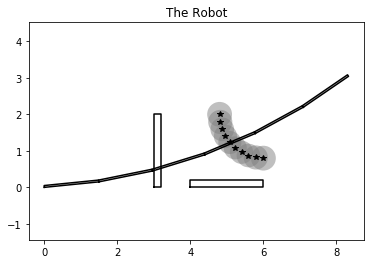

In [3]:
q_random = [0.1] * 8

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, q_random, 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'k')
plt.show()

# single sampling run

In [13]:
# change settings for sampling
#robot1.do_check_self_collision = True
robot1.ik_samples = [5, 5, 5]
for tp in path1:
    tp.p[2].set_samples(20)

In [14]:
start_time = time.time()

path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='random',N_cart=10,N_red_joints=125)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='halton',N_cart=10,N_red_joints=125)

print([len(qp) for qp in path_js])
sol = get_shortest_path(path_js)
print(sol['success'])

print("Total time: " + str(time.time()-start_time))
print("Path length: " + str(sol['length']))

Collision checks: 6626
[201, 55, 20, 18, 12]
converting type of Q
True
Total time: 0.7383394241333008
Path length: 1.4877383708953857


In [7]:
times = []
costs = []
cc_checks = []
for i in range(5):
    start_time = time.time()

    path_js, cc = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='random',
                                N_cart=10,
                                N_red_joints=125,
                                return_cc_counter=True)

    print([len(qp) for qp in path_js])
    sol = get_shortest_path(path_js)
    print(sol['success'])
    
    times.append(time.time()-start_time)
    costs.append(sol['length'])
    cc_checks.append(cc)

print("Total time: " + str(np.mean(times)))
print("Path length: " + str(np.mean(costs)))
print("Collision checks: " + str(np.mean(cc_checks)))

[183, 191, 98, 97, 77, 140, 148, 122, 78, 116]
converting type of Q
True
[154, 260, 244, 181, 137, 54, 99, 73, 44, 92]
converting type of Q
True
[132, 131, 152, 235, 118, 114, 110, 54, 78, 86]
converting type of Q
True
[106, 94, 53, 42, 83, 100, 44, 31, 82, 46]
converting type of Q
True
[152, 162, 123, 125, 112, 95, 122, 122, 109, 43]
converting type of Q
True
Total time: 0.759515190125
Path length: 4.81290063858
Collision checks: 6905.2


Total numner of samples for ik: 2500


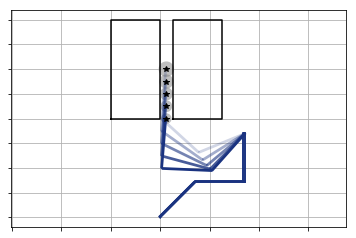

In [15]:
# total number of samples
N_tot = np.prod(robot1.ik_samples) * 20
print("Total numner of samples for ik: " + str(N_tot))

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()

# multiple run sampling

In [3]:
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
settings = {'max_iters': 20, 'min_js': 100, 'js_inc': 10, 'red_js_inc': 100,
            'ik_sampling_method': 'random'}
path_js = cart_to_joint_dynamic(robot1, path1, check_collision = True, scene=sc1,
                                parameters=settings)

Processing trajectory point[ 4.8  2.   0. ]
Using 'halton' sampling for cartesian tolerance
Using 'random' sampling for redundant kinematics
Found 200 joint solutions
After 0 iterations
Processing trajectory point[ 4.8182307   1.79162219  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'random' sampling for redundant kinematics
Found 217 joint solutions
After 0 iterations
Processing trajectory point[ 4.87236886  1.58957583  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'random' sampling for redundant kinematics
Found 125 joint solutions
After 0 iterations
Processing trajectory point[ 4.96076952  1.4         0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'random' sampling for redundant kinematics
Found 153 joint solutions
After 0 iterations
Processing trajectory point[ 5.08074667  1.22865487  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'random' sampling for redundant kinematics
Found 112 joint solutions
After

In [4]:
print([len(qp) for qp in path_js])
sol = get_shortest_path(path_js)
print(sol['success'])

[200, 217, 125, 153, 112, 107, 136, 181, 194, 197]
converting type of Q
True


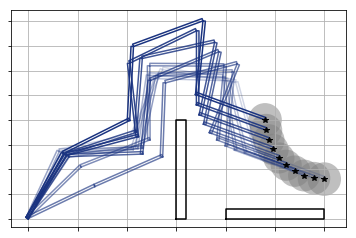

In [5]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()

In [14]:
from ppr.graph_pure_python import get_shortest_path, get_shortest_path_segments

In [24]:
sol2 = get_shortest_path_segments(path_js, 8)
print(sol2)

{'success': True, 'path': [array([ 0.91144973, -0.16336282,  0.48085603, -0.98542166, -0.39192027,
        1.60930419], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.92387962, -0.35581523,
        1.56337059], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.95010918, -0.21589302,
        1.60481834], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.89156121, -0.33304825,
        1.81856596], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.0429728 , -0.11629024,
        1.90835989], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.05287123, -0.2678504 ,
        2.0698185 ], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.56963724,  0.3600274 ,
        0.95585233], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.51095361,  0.35318205,
        0.94381106], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.60162038,  0.18154772,
        0.86963832], dtype=fl

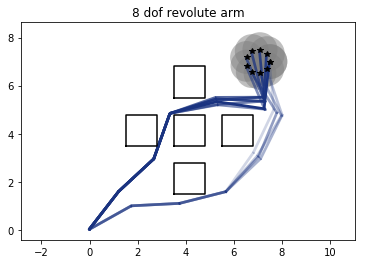

In [25]:

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol2['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
    
plt.title("8 dof revolute arm")
plt.show()

In [43]:
from ppr.sampling import iterative_bfs

In [44]:
sol3 = iterative_bfs(robot1, path1, sc1, tol=0.01, red=3, max_iter=5)
print(sol3)

converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
{'success': False, 'path': [array([ 0.18079062,  1.20246387,  0.55807251, -1.40377641, -1.31600904,
        0.17082542]), array([ 0.16080271,  1.20494366,  0.55674654, -1.45909464, -1.32609785,
        0.25506657]), array([ 0.11287982,  1.22601461,  0.55930322, -1.49390483, -1.32408905,
        0.31216303]), array([ 0.0590434 ,  1.24001253,  0.55820525, -1.50176132, -1.32634461,
        0.3632116 ]), array([ 0.02094554,  1.22252631,  0.56138444, -1.49852562, -1.32634497,
        0.41238093]), array([-0.015366  ,  1.20576227,  0.55276728, -1.48067498, -1.31042242,
        0.44030067]), array([-0.01278909,  1.14240038,  0.55309784, -1.48013055, -1.26792955,
        0.45771784]), array([  1.38224533e-03,   1.04918194e+00,   5.81591904e-01,
        -1.47035551e+00,  -1.22887993e+00,   4.59446013e-01]), array([-0.0413379 ,  1.02781534,  0.58249575, -1.3811388 , -1.22916925,
        0.433

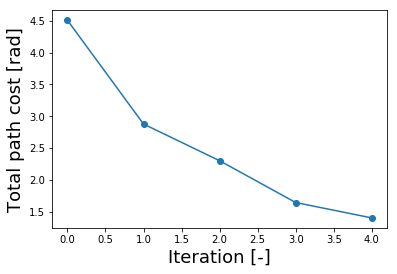

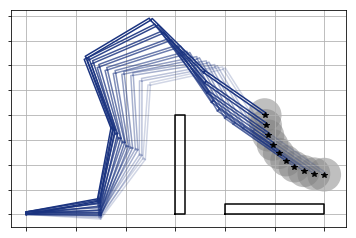

In [45]:
plt.plot(sol3['length_all_iterations'], 'o-')
plt.xlabel("Iteration [-]", fontsize=18)
plt.ylabel("Total path cost [rad]", fontsize=18)
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol3['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()